In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
print(data)
data.head()

       Unnamed: 0                track_id                            artists  \
0               0  5SuOikwiRyPMVoIQDJUgSV                        Gen Hoshino   
1               1  4qPNDBW1i3p13qLCt0Ki3A                       Ben Woodward   
2               2  1iJBSr7s7jYXzM8EGcbK5b             Ingrid Michaelson;ZAYN   
3               3  6lfxq3CG4xtTiEg7opyCyx                       Kina Grannis   
4               4  5vjLSffimiIP26QG5WcN2K                   Chord Overstreet   
...           ...                     ...                                ...   
29234       29234  6X6wIzuxsh7GVNMPz1xTNa                   Hillsong Worship   
29235       29235  5y8ARSg47Yx52xvQQAlS35                         Mosaic MSC   
29236       29236  6PM55W7WiUmHVPdUebJP55                      Planetshakers   
29237       29237  0XEgJiDryoDd2gIJhVXghd  Bryan & Katie Torwalt;Brock Human   
29238       29238  3FjOBB4EyIXHYUtSgrIdY9                      Jesus Culture   

                                       

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,artist_popularity,duration_ms,explicit,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,58,230666,False,0.676,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,42,149610,False,0.420,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,54,210826,False,0.438,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,57,201933,False,0.266,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,59,198853,False,0.618,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
for col in data.columns:
    features=col
    print(features)

Unnamed: 0
track_id
artists
album_name
track_name
popularity
artist_popularity
duration_ms
explicit
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
track_genre


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29239 entries, 0 to 29238
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         29239 non-null  int64  
 1   track_id           29239 non-null  object 
 2   artists            29239 non-null  object 
 3   album_name         29239 non-null  object 
 4   track_name         29239 non-null  object 
 5   popularity         29239 non-null  int64  
 6   artist_popularity  29239 non-null  int64  
 7   duration_ms        29239 non-null  int64  
 8   explicit           29239 non-null  bool   
 9   danceability       29239 non-null  float64
 10  energy             29239 non-null  float64
 11  key                29239 non-null  int64  
 12  loudness           29239 non-null  float64
 13  mode               29239 non-null  int64  
 14  speechiness        29239 non-null  float64
 15  acousticness       29239 non-null  float64
 16  instrumentalness   292

In [6]:


# Mapping dictionary
genre_mapping = {
    'acoustic': 'World/Folk',
    'afrobeat': 'World/Folk',
    'alt-rock': 'Rock',
    'ambient': 'Electronic',
    'anime': 'World/Folk',
    'black-metal': 'Rock',
    'bluegrass': 'World/Folk',
    'blues': 'World/Folk',
    'breakbeat': 'Electronic',
    'british': 'Rock',
    'chicago-house': 'Electronic',
    'chill': 'Electronic',
    'classical': 'Classical',
    'club': 'Electronic',
    'comedy': 'Other/Miscellaneous',
    'country': 'World/Folk',
    'dance': 'Pop',
    'dancehall': 'World/Folk',
    'death-metal': 'Rock',
    'deep-house': 'Electronic',
    'detroit-techno': 'Electronic',
    'disco': 'Pop',
    'drum-and-bass': 'Electronic',
    'dub': 'Electronic',
    'dubstep': 'Electronic',
    'edm': 'Pop',
    'electro': 'Electronic',
    'electronic': 'Electronic',
    'emo': 'Rock',
    'folk': 'World/Folk',
    'forro': 'World/Folk',
    'funk': 'World/Folk',
    'garage': 'World/Folk',
    'goth': 'Rock',
    'grindcore': 'Rock',
    'groove': 'World/Folk',
    'grunge': 'Rock',
    'guitar': 'World/Folk',
    'happy': 'Other/Miscellaneous',
    'hard-rock': 'Rock',
    'hardcore': 'Rock',
    'hardstyle': 'Electronic',
    'heavy-metal': 'Rock',
    'hip-hop': 'Hip-Hop/Rap',
    'honky-tonk': 'World/Folk',
    'house': 'Electronic',
    'idm': 'Electronic',
    'indie': 'Rock',
    'industrial': 'Rock',
    'j-dance': 'Electronic',
    'j-pop': 'Pop',
    'j-rock': 'Rock',
    'jazz': 'Jazz',
    'malay': 'World/Folk',
    'mandopop': 'Pop',
    'metal': 'Rock',
    'metalcore': 'Rock',
    'minimal-techno': 'Electronic',
    'mpb': 'World/Folk',
    'new-age': 'Classical',
    'party': 'Other/Miscellaneous',
    'piano': 'Classical',
    'pop-film': 'Pop',
    'pop': 'Pop',
    'power-pop': 'Pop',
    'progressive-house': 'Electronic',
    'psych-rock': 'Rock',
    'punk-rock': 'Rock',
    'punk': 'Rock',
    'r-n-b': 'Pop',
    'reggae': 'World/Folk',
    'reggaeton': 'World/Folk',
    'rock-n-roll': 'Rock',
    'rock': 'Rock',
    'rockabilly': 'World/Folk',
    'romance': 'Other/Miscellaneous',
    'sad': 'Other/Miscellaneous',
    'show-tunes': 'Other/Miscellaneous',
    'singer-songwriter': 'World/Folk',
    'ska': 'World/Folk',
    'sleep': 'Other/Miscellaneous',
    'soul': 'World/Folk',
    'study': 'Other/Miscellaneous',
    'synth-pop': 'Pop',
    'tango': 'World/Folk',
    'techno': 'Electronic',
    'trance': 'Electronic',
    'trip-hop': 'Electronic',
    'world-music': 'World/Folk'
}

# Apply the mapping
data['track_genre'] = data['track_genre'].replace(genre_mapping)



In [7]:
data=data.dropna()
data = data[data['popularity'] != 0]
data['instrumentalness'] = np.log(data['instrumentalness'].replace(0, np.nan)).fillna(0)
data['acousticness'] = np.log(data['acousticness'].replace(0, np.nan)).fillna(0)
data['speechiness'] = np.log(data['speechiness'].replace(0, np.nan)).fillna(0)
data['liveness'] = np.log(data['liveness'].replace(0, np.nan)).fillna(0)
data['duration_ms'] = np.log(data['duration_ms'].replace(0, np.nan)).fillna(0)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29239 entries, 0 to 29238
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         29239 non-null  int64  
 1   track_id           29239 non-null  object 
 2   artists            29239 non-null  object 
 3   album_name         29239 non-null  object 
 4   track_name         29239 non-null  object 
 5   popularity         29239 non-null  int64  
 6   artist_popularity  29239 non-null  int64  
 7   duration_ms        29239 non-null  float64
 8   explicit           29239 non-null  bool   
 9   danceability       29239 non-null  float64
 10  energy             29239 non-null  float64
 11  key                29239 non-null  int64  
 12  loudness           29239 non-null  float64
 13  mode               29239 non-null  int64  
 14  speechiness        29239 non-null  float64
 15  acousticness       29239 non-null  float64
 16  instrumentalness   292

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data_train, data_test = train_test_split(data.copy(),
                                            test_size=.2,
                                            random_state=440,
                                            shuffle=True)

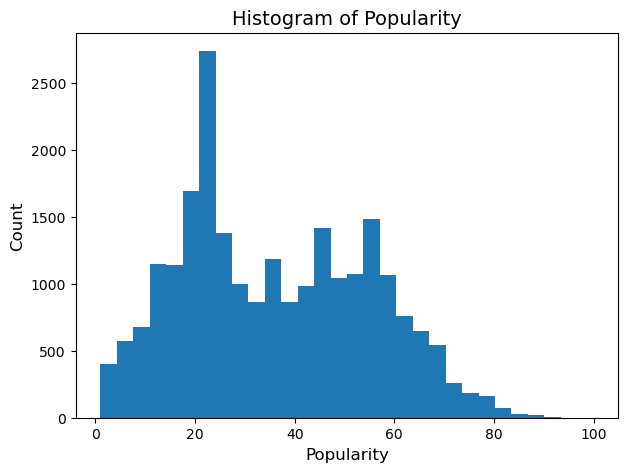

In [11]:
plt.figure(figsize=(7,5))

plt.hist(data_train.popularity, bins=30)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel("Count", fontsize=12)
plt.xlabel("Popularity", fontsize=12)

plt.title("Histogram of Popularity", fontsize=14)

plt.show()


In [12]:
genres = data['track_genre'].unique().tolist()
print(genres)


['World/Folk', 'Rock', 'alternative', 'Electronic', 'Classical', 'Other/Miscellaneous', 'Pop', 'Hip-Hop/Rap', 'Jazz']


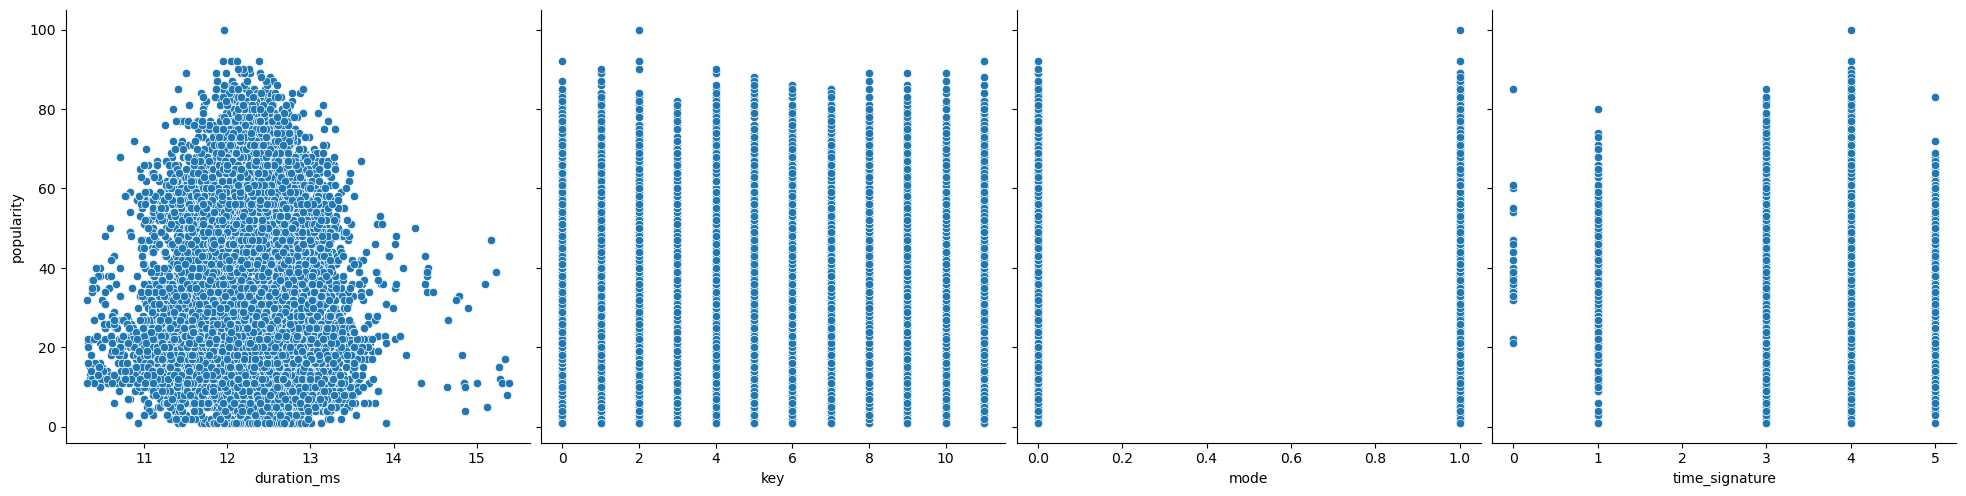

In [13]:
sns.pairplot(data_train,
                y_vars = ['popularity'],
                x_vars = ['duration_ms', 'key', 'mode', 'time_signature'],
                height = 5)

In [14]:
columns_to_include = ['popularity', 'artist_popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [15]:
average_data = data.groupby('artists')[columns_to_include].mean().reset_index()

In [16]:
average_data

,artists,popularity,artist_popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,!nvite,23.000000,23.0,11.830355,0.820500,0.519000,-10.173000,-1.352906,-0.754543,-4.789674,-2.052016,0.4150,84.997000
1,"""Weird Al"" Yankovic",27.400000,54.0,12.317590,0.652800,0.557900,-9.582200,-2.586831,-2.241635,-2.215230,-1.787155,0.7767,117.185400
2,$affie,39.000000,17.0,11.809364,0.744000,0.178000,-13.225000,-2.306593,-0.213193,-0.116534,-2.343407,0.2300,148.260000
3,$affie;lofi stu,43.000000,17.0,11.765900,0.821000,0.252000,-8.882000,-3.107782,-0.132389,-0.141564,-2.216407,0.2830,74.997000
4,&ME;Rampa;Adam Port;Sofie Royer,50.000000,58.0,12.861266,0.772000,0.485000,-14.388000,-2.795243,-7.846803,-0.166055,-2.393604,0.1560,120.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13854,yama,58.666667,59.0,12.204227,0.528333,0.776667,-4.997333,-2.565440,-2.537506,-6.972769,-1.183545,0.5600,102.055667
13855,yetep;Caslow;Lexi Scatena,45.000000,39.0,12.173834,0.563000,0.809000,-6.069000,-3.040730,-3.789805,-12.302584,-2.047943,0.3000,145.078000
13856,yetep;Kyle Reynolds,47.000000,39.0,12.362076,0.468000,0.611000,-6.015000,-3.420380,-0.652005,-11.706510,-1.910543,0.2460,154.099000
13857,yeule,48.000000,47.0,12.346249,0.427500,0.613000,-9.585500,-2.642444,-1.602795,-5.537206,-1.821342,0.0735,123.056500


In [17]:
average_data.sort_values(by='artist_popularity')

,artists,popularity,artist_popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
6439,Kenyaman,23.5,0.0,12.239841,0.499,0.465,-8.709,-1.490520,-1.848738,0.000000,-2.577715,0.2535,75.119
7774,Masala Coffee;Rohit Paritala,26.0,0.0,12.363521,0.760,0.744,-5.180,-3.020025,-0.721547,0.000000,-1.897120,0.4810,101.981
5996,John Caparulo,21.0,0.0,12.729424,0.633,0.346,-16.400,-0.054456,-0.132389,0.000000,-0.327116,0.5120,107.818
7949,Meet Bros.;Palak Muchhal;Altamash Faridi,63.0,0.0,12.420426,0.634,0.648,-6.781,-3.189317,-1.018877,0.000000,-0.479650,0.6670,95.989
858,Anupam Roy;Rahat Fateh Ali Khan,37.0,0.0,12.696599,0.264,0.437,-6.086,-3.486755,-0.132389,0.000000,-2.137071,0.1360,175.633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,Ariana Grande;Doja Cat,78.0,90.0,12.031654,0.789,0.742,-5.664,-2.730296,-2.686778,0.000000,-1.795767,0.6610,116.965
12379,The Weeknd;Daft Punk,3.0,91.0,12.503158,0.773,0.820,-5.897,-2.162823,-0.931404,0.000000,-2.605042,0.5550,92.996
3612,Drake;21 Savage,91.0,93.0,12.293919,0.529,0.673,-4.711,-1.742969,-8.088663,-12.935884,-2.375156,0.3660,165.921
3613,Drake;Travis Scott,83.0,93.0,12.581680,0.666,0.465,-8.545,-1.347074,-2.989750,0.000000,-1.537117,0.2920,167.937


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
# Preprocess the data
# Assuming 'features' contains the features of each artist
X = average_data[columns_to_include]  # Features of artists
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

In [19]:
# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=440)

In [20]:
# Train the k-NN model
k = 5  # Number of neighbors to consider
knn = NearestNeighbors(n_neighbors=k,metric='cosine') #cosine is used for recommendation systems
knn.fit(X_train)

NearestNeighbors(metric='cosine')

In [21]:
# Get input artist from the user
input_artist = input("Enter the name of the artist: ")

# Find the index of the input artist in the dataset
input_index = average_data.index[average_data['artists'] == input_artist].tolist()

# If input artist not found
if not input_index:
    print("Artist not found.")
else:
    # Get the features of the input artist
    query_features = X_scaled[input_index]

    # Find k similar artists
    distances, indices = knn.kneighbors(query_features)

    # Print the indices of similar artists
    print("Indices of similar artists:", indices)

    # Get the details of similar artists from the dataset
    similar_artists = average_data.iloc[indices[0]]

    # Print the details of similar artists
    print("Similar Artists:")
    print(similar_artists)

Enter the name of the artist: Taylor Swift
Indices of similar artists: [[2122  739 3714    3 8744]]
Similar Artists:
                         artists  popularity  artist_popularity  duration_ms  \
2122                 Campedrinos        44.0               46.0    12.120586   
739                 Andy Parsons        22.0               13.0    11.800383   
3714  Dutch Movement;FeestDJRuud        23.0               36.0    12.548300   
3                $affie;lofi stu        43.0               17.0    11.765900   
8744                 No Vacation        56.4               53.0    12.342638   

      danceability  energy  loudness  speechiness  acousticness  \
2122        0.7450  0.8970   -3.8920    -2.225624     -1.382302   
739         0.4620  0.7375  -15.6010    -0.073704     -0.164932   
3714        0.6300  0.9390   -1.4830    -2.047943     -0.848632   
3           0.8210  0.2520   -8.8820    -3.107782     -0.132389   
8744        0.5082  0.7184   -6.8972    -3.396287     -2.117709   
